# Bilayer Tc vs film thickness Calculation
This file simulates the Al/Ti bilayer discussed in
[Zhao et al. 2018](https://doi.org/10.1088/1361-6668/aad788) and determines the transition
temperature as a function of aluminum thickness. Figure 4 from the paper is
reproduced. Although, we are using a full numerical simulation as opposed to
their simpler algorithm

We start with the standard import statements. (matplotlib is not a requirement
for this library, so it must be installed separately for this notebook to run).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.constants import hbar, k, e
from superconductivity.gap_functions import delta_bcs
from superconductivity.multilayer import Stack, Superconductor

%matplotlib inline

To define a bilayer, we need the thickness, transition temperature,
Debye temperature, diffusion constant, and resistivity for each layer. These
numbers are taken from the paper.

In [2]:
# Ti parameters
# thickness [m]
d_ti = 100e-9
# transition temperature [K]
tc_ti = [0.55, 0.588]
# Debye temperature [K]
td_ti = 426
# diffusion constant [m^2 / s]
dc_ti = 1.5
# resistivity [Ohm m]
rho_ti = 1 / 5.88 * 1e-6

# Al parameters
# thickness [m]
d_al = np.linspace(1e-9, 500e-9, 20)
# transition temperature [K]
tc_al = 1.2
# Debye temperature [K]
td_al = 423
# diffusion constant [m^2 / s]
dc_al = 35
# resistivity [Ohm m]
rho_al = 1 / 132 * 1e-6

# boundary resistance [Ohm m^2]
rb = 0.0
# temperature [K]
t = 0.1


The simulation is done by first creating the superconductor objects, setting
some simulation parameters, adding them to a stack object, and updating the
material properties. The stack.tc attribute is then populated, and we can plot
it.

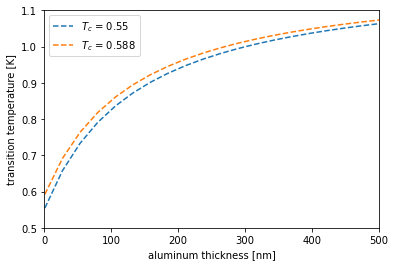

In [3]:
figure, axes = plt.subplots()
for tci in tc_ti:
    tc = np.zeros(len(d_al))
    for ii, dii in enumerate(d_al):
        # Define the superconductors.
        al = Superconductor(dii, rho_al, t, td_al, tc_al, dc_al)
        ti = Superconductor(d_ti, rho_ti, t, td_ti, tci, dc_ti)

        # Add the superconductors to a stack.
        stack = Stack([al, ti], rb)

        # Do the simulation.
        stack.update()

        tc[ii] = stack.tc
    axes.plot(d_al * 1e9, tc, label=f"$T_c$ = {tci}", linestyle='--')
axes.set_xlim(0, 500)
axes.set_ylim(0.5, 1.1)
axes.set_xlabel("aluminum thickness [nm]")
axes.set_ylabel("transition temperature [K]")
axes.legend();